# Laboratorio: Árboles de decisión, reglas y ensemble learning                                                                                                                                                                                              Elaborado por: Jerald David Larios Cruz



In [24]:
#Importando nuestro dataset usando la libreria pandas
import pandas as pd

dataset = pd.read_csv('Laboratorio_dataset_car.csv',delimiter=";")
 
dataset.head(10)

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,low,unacc
8,vhigh,vhigh,2,2,big,med,unacc
9,vhigh,vhigh,2,2,big,high,unacc


Diferentes clases que existen: 4 clases diferentes

In [2]:
import numpy as np
clases=np.unique(dataset['class'])
print(clases)
dataset.shape[0]

['acc' 'good' 'unacc' 'vgood']


1750

In [3]:
#Número de muestras por cada una de las clases
dataset['class'].value_counts()

unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64

(array([1215.,    0.,    0.,  390.,    0.,    0.,   70.,    0.,    0.,
          75.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

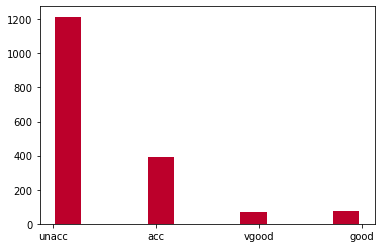

In [35]:
#Grafica de las clases y la cantidad de cada una
import matplotlib.pyplot as plot
plot.hist(x=dataset['class'], bins=10, color='#bc002b', rwidth=0.85)

In [4]:
#solo considerar la columna class
y = dataset['class']
#considerar las demás columnas, eliminando la columna class
X = dataset.drop(columns=['class'])
X.describe()

,Buying,Maintenance,Doors,Person,lug_boot,safety
count,1750,1750,1750,1750,1750,1750
unique,4,4,4,3,3,3
top,vhigh,low,2,4,big,high
freq,443,447,444,587,585,590


In [5]:
print(np.unique(X['Buying']))
print(np.unique(X['Maintenance']))
print(np.unique(X['Doors']))
print(np.unique(X['Person']))
print(np.unique(X['lug_boot']))
print(np.unique(X['safety']))

['high' 'low' 'med' 'vhigh']
['high' 'low' 'med' 'vhigh']
['2' '3' '4' '5more']
['2' '4' 'more']
['big' 'med' 'small']
['high' 'low' 'med']


Como podemos observar todas las variables son categoricas en este caso tendremos que convestirlas a numéricas ya que los algoritmos solo trabajan con variables numéricas. Tambien podemos observar por cada una de las varibles cuantos varores unicos tenemos

In [6]:
X["Buying"] = X["Buying"].astype('category').cat.codes
X["Maintenance"] = X["Maintenance"].astype('category').cat.codes
X["Doors"] = X["Doors"].astype('category').cat.codes
X["Person"] = X["Person"].astype('category').cat.codes
X["lug_boot"] = X["lug_boot"].astype('category').cat.codes
X["safety"] = X["safety"].astype('category').cat.codes
y = y.astype('category').cat.codes

In [7]:
#conjunto de datos transformado a numérico
X.head()

,Buying,Maintenance,Doors,Person,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


Como podemos observar ahora nuestro conjunto de datos es númerico y es lo que necesitamos para trabajar con el algoritmo que vamos a implementar

In [8]:
#Describiendo nuestro conjunto de datos
X.describe()

,Buying,Maintenance,Doors,Person,lug_boot,safety
count,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000,1750.000000
mean,1.509714,1.500571,1.493714,1.004000,0.998286,0.995429
std,1.118311,1.115282,1.121399,0.815436,0.816845,0.818582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [9]:
# Dividir de conjuntos en entrenamieto y prueba
# 15% de prueba %85 de entremamiento
from sklearn.model_selection import train_test_split 
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.15, random_state=1, shuffle=True)

Arbol de decisión CART con selección de atributos GINI

In [10]:
#Entrenamiento
from sklearn.tree import DecisionTreeClassifier
arbol_gini = DecisionTreeClassifier(criterion='gini')
arbol_gini.fit(X_train,Y_train)
predictions_gini = arbol_gini.predict(X_validation)

In [11]:
# Evaluamos las predicciones, en primer lugar la precisión obtenida 
from sklearn.metrics import accuracy_score 
print(accuracy_score(Y_validation, predictions_gini)*100,'%')

99.23954372623575 %


Ahora vamos a graficar nuestra matriz de confusión

C:\Users\jlarios.UNAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


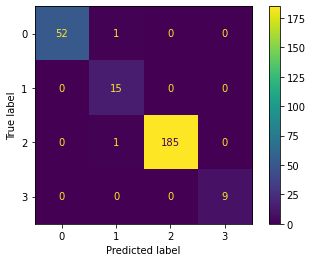

In [12]:
# importamos Matplotlib para muestra de gráficas
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
# Graficar la matriz de confusión
from sklearn.metrics import plot_confusion_matrix
#ahora la matriz de confusión donde 0 es 'acc', 1 es 'good', 2 es 'unacc' y 3 es 'vgood']
plot_confusion_matrix(arbol_gini,X_validation,Y_validation)
plt.show()

In [13]:
#finalmente un informe de clasificación que ofrece un desglose de cada clase por precisión, recuerdo, puntuación f1 y apoyo, mostrando excelentes resultados (dado que el conjunto de datos de validación era pequeño). 
# Reporte de clasificación: Acc, Recall y F1
from sklearn.metrics import classification_report 
print(classification_report(Y_validation, predictions_gini))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.88      1.00      0.94        15
           2       1.00      0.99      1.00       186
           3       1.00      1.00      1.00         9

    accuracy                           0.99       263
   macro avg       0.97      0.99      0.98       263
weighted avg       0.99      0.99      0.99       263



In [16]:
# Observar el aprendizaje del árbol
from sklearn import tree
import pydotplus
data = tree.export_graphviz(arbol_gini, out_file=None, feature_names=X.columns, class_names=list(clases), filled=True, rounded=True, special_characters=True) 
graph = pydotplus.graph_from_dot_data(data) 
#graph.write_png('mydecisiontreegini.png') 
#img = pltimg.imread('mydecisiontree_gini.png') 
#imgplot = plt.imshow(img) 
plt.show()

Random forest

In [18]:
#Entrenamiento
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(criterion='entropy')
random_forest.fit(X_train,Y_train)
predictions_rf = random_forest.predict(X_validation)

In [19]:
# Evaluamos las predicciones, en primer lugar la precisión obtenida 
print(accuracy_score(Y_validation, predictions_rf)*100,'%')

97.71863117870723 %


C:\Users\jlarios.UNAN\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


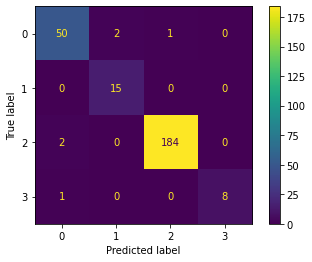

In [20]:
#ahora la matriz de confusión 
plot_confusion_matrix(random_forest,X_validation,Y_validation)
plt.show()

In [21]:
#finalmente un informe de clasificación que ofrece un desglose de cada clase por precisión, recuerdo, puntuación f1 y apoyo, mostrando excelentes resultados (dado que el conjunto de datos de validación era pequeño). 
print(classification_report(Y_validation, predictions_rf))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        53
           1       0.88      1.00      0.94        15
           2       0.99      0.99      0.99       186
           3       1.00      0.89      0.94         9

    accuracy                           0.98       263
   macro avg       0.96      0.96      0.95       263
weighted avg       0.98      0.98      0.98       263

